# Imports and definitions

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from collections import namedtuple, OrderedDict
import attr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from pf.pfasst import PFASST, Experiment, Params
from tqdm import tqdm_notebook as tqdm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
    
exe = '/home/bkrull/devel/pfasst-nwchem/block_worktree/test/imk/main.exe'
mag = '/home/bkrull/devel/pfasst-nwchem/libpfasst/tests/toda/main.exe'
exp = Experiment()

sns.set()
sns.set_style("whitegrid", {"legend.frameon": True})
sns.set_context("talk")
colors = sns.color_palette()

results_home = '/home/bkrull/Documents/script/script-imk/img/'

In [5]:
def plot_iteration_behavior(results, logy=True, fname=None):
    fig, ax = plt.subplots()
    for k, rr in results.iteritems():
        r = rr['val']
        ax.plot(r.dt.values,
        r.iterations.values, label=k, marker='o')

    ax.set_xscale("log", nonposx='clip')
    ax.set_xlabel('$\Delta t$')
    ax.set_ylabel('Mean Iterations per Step')

    if logy:
        ax.set_yscale("log", nonposy='clip')
        iters = np.linspace(0, 6, num=4)
        iters = np.power(2, iters).astype(np.float_)

    else:
        iters = np.linspace(0, 30, num=4)

    dt = np.linspace(-1, 0, num=2)
    dt = np.power(10, dt).astype(np.float_)

    ax.set_xticks(dt)
    ax.set_xticklabels(dt)
    ax.set_yticks(iters)
    ax.set_yticklabels(map(int, iters))
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if fname:
        fig.savefig(fname, dpi=300)

In [6]:
def plot_timings(results, fname=None):
    fig, ax = plt.subplots()

    for k, r in results.iteritems():
        if type(r) is list:
            continue

        times = []

        for time in r['val'].total_times:
            times.append(sum(time.values()))

        ax.plot(r['val'].nsteps.values, times, marker='o', label=k)

    ax.set_xlabel('Number of steps')
    ax.set_ylabel('Wall Time (seconds)')
    ax.legend()
    if fname:
        fig.savefig(fname, dpi=300)

In [7]:
def plot_convergence(results, fname=None):
    fig, ax = plt.subplots()
    for k, r in results.iteritems():
        ax.plot(r['val'].dt.values,
                r['val'].error.values,
                label=k, marker='o')

    ax.set_ylabel('Error')
    ax.set_xlabel('$\Delta t$')
    ax.set_xscale("log", nonposx='clip')
    ax.set_yscale("log", nonposy='clip')
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if fname:
        fig.savefig(fname, dpi=150, bbox_inches="tight")

# Toda solutions
The plots below show periodic and non-periodic 11-particle Toda lattice solutions. Plots indicate the back-transformed original variables.

env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1
Params(exe='/home/bkrull/devel/pfasst-nwchem/block_worktree/test/imk/main.exe', filename=None, levels=1, tfinal=10.0, iterations=1, nsteps=128, nodes=[5], magnus=[1], nterms=[5], sweeps=[1], sweeps_pred=[0], exptol=['1.d-15'], nprob=4, tasks=1, basis='', molecule='', exact_dir='', nersc=False, dt=0.078125, timings=False, solutions=True, particles=11, periodic=True, vcycle=True, tolerance=1e-12, qtype='lob', inttype='imk', sdc=True, rk=False, mkrk=False)


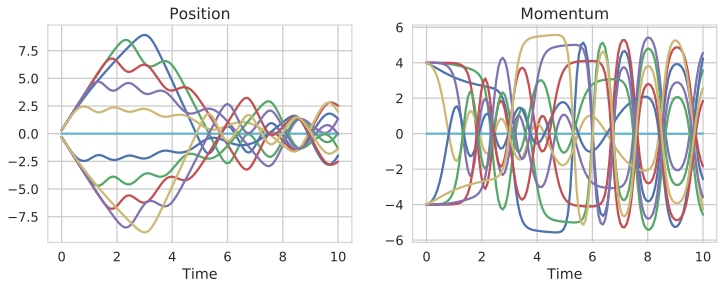

In [9]:
%rm output/*particles_11*
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1
levels = 1
params_11 = Params(inttype='imk.rk', qtype='lob', levels=levels, exe=exe,
                   nterms=[5]*levels, nodes=[5]*levels, tfinal=10.0, 
                   sweeps=[1]*levels, sweeps_pred=[0]*levels, vcycle=True,
                   nsteps=128, solutions=True, iterations=1, sdc=True)
print(params_11)
toda_11 = PFASST(params_11)

results_rk = toda_11.run()[0]

fig, (ax1, ax2) = toda_11.plot_toda(results_rk, maxparticles=0)

env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1
Params(exe='/home/bkrull/devel/pfasst-nwchem/libpfasst/tests/imk/main.exe', filename=None, levels=1, tfinal=10.0, iterations=1, nsteps=128, nodes=[5], magnus=[1], nterms=[5], sweeps=[1], sweeps_pred=[0], exptol=['1.d-15'], nprob=4, tasks=1, basis='', molecule='', exact_dir='', nersc=False, dt=0.078125, timings=False, solutions=True, particles=11, periodic=True, vcycle=True, tolerance=1e-12, qtype='lob', inttype='imk.mkrk', sdc=True, rk=False, mkrk=True)


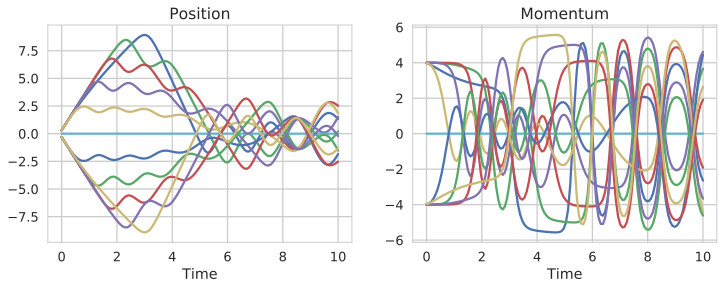

In [231]:
%rm output/*particles_11*
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1
levels = 1
params_11 = Params(inttype='imk.mkrk', qtype='lob', levels=levels, exe=exe,
                   nterms=[5]*levels, nodes=[5]*levels, tfinal=10.0, 
                   sweeps=[1]*levels, sweeps_pred=[0]*levels, vcycle=True,
                   nsteps=128, solutions=True, iterations=1, sdc=True)
print(params_11)
toda_11 = PFASST(params_11)

results_mkrk = toda_11.run()[0]

fig, (ax1, ax2) = toda_11.plot_toda(results_mkrk, maxparticles=0)

In [236]:
%rm output/*particles_11*
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1
levels = 1
params_11 = Params(inttype='imk', qtype='lob', levels=levels, exe=exe,
                   nterms=[5]*levels, nodes=[5]*levels, tfinal=10.0, 
                   sweeps=[1]*levels, sweeps_pred=[1]*levels, vcycle=True,
                   nsteps=128, solutions=True, iterations=1, sdc=True)
print(params_11)
toda_11 = PFASST(params_11)

results_imk = toda_11.run()[0]

# fig, (ax1, ax2) = toda_11.plot_toda(results_imk, maxparticles=0)

env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1
Params(exe='/home/bkrull/devel/pfasst-nwchem/libpfasst/tests/imk/main.exe', filename=None, levels=1, tfinal=10.0, iterations=1, nsteps=128, nodes=[5], magnus=[1], nterms=[5], sweeps=[1], sweeps_pred=[1], exptol=['1.d-15'], nprob=4, tasks=1, basis='', molecule='', exact_dir='', nersc=False, dt=0.078125, timings=False, solutions=True, particles=11, periodic=True, vcycle=True, tolerance=1e-12, qtype='lob', inttype='imk', sdc=True, rk=False, mkrk=False)


env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1
Params(exe='/home/bkrull/devel/pfasst-nwchem/libpfasst/tests/toda/main.exe', filename=None, levels=1, tfinal=10.0, iterations=1, nsteps=128, nodes=[3], magnus=[2], nterms=[5], sweeps=[1], sweeps_pred=[0], exptol=['1.d-15'], nprob=4, tasks=1, basis='', molecule='', exact_dir='', nersc=False, dt=0.078125, timings=False, solutions=True, particles=11, periodic=True, vcycle=False, tolerance=1e-12, qtype='lob', inttype='mag', sdc=True, rk=False, mkrk=False)


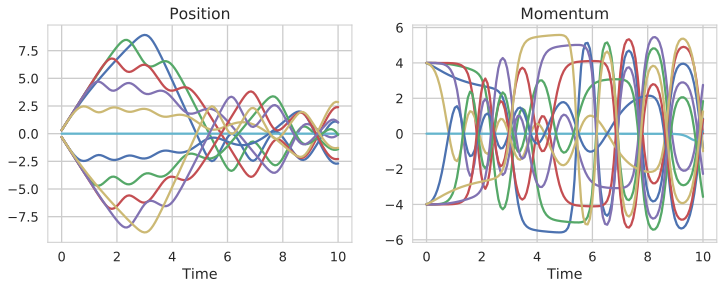

In [237]:
%rm output/*particles_11*
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1
levels = 1
params_11 = Params(inttype='mag', qtype='lob', levels=levels, exe=mag,
                   magnus=[2]*levels, nodes=[3]*levels, tfinal=10.0, 
                   sweeps=[1]*levels, sweeps_pred=[0]*levels, vcycle=False,
                   nsteps=128, solutions=True, iterations=1, sdc=True)
print(params_11)
toda_11 = PFASST(params_11)

results_mag = toda_11.run()[0]

fig, (ax1, ax2) = toda_11.plot_toda(results_mag, maxparticles=0)

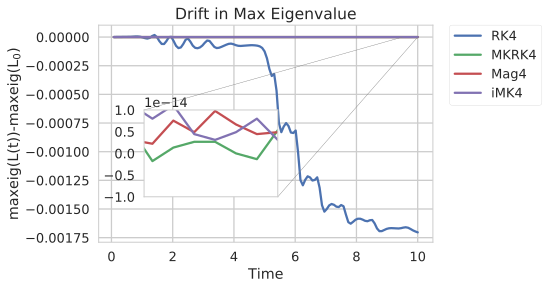

In [238]:
fig, ax = plt.subplots()

eig0 = np.linalg.eigvals(results_imk.loc[0, 'solution'])
evals = {}

vals = []
for i, row in results_rk.iterrows():
    vals.append(np.max(row.eigval)-np.max(eig0))
evals['rk'] = vals

vals = []
for i, row in results_mkrk.iterrows():
    vals.append(np.max(row.eigval)-np.max(eig0))
evals['mkrk'] = vals

vals = []
for i, row in results_imk.iterrows():
    vals.append(np.max(row.eigval)-np.max(eig0))
evals['imk'] = vals
    
vals = []
for i, row in results_mag.iterrows():
    vals.append(np.max(row.eigval)-np.max(eig0))
evals['mag'] = vals
    
ax.plot(results_rk.time, evals['rk'], label='RK4')
ax.plot(results_rk.time, evals['mkrk'], label='MKRK4')
ax.plot(results_rk.time, evals['mag'], label='Mag4')
ax.plot(results_rk.time, evals['imk'], label='iMK4')


ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('Time')
ax.set_ylabel('maxeig(L(t))-maxeig(L$_0$)')
ax.set_title('Drift in Max Eigenvalue')

# inset_axes = zoomed_inset_axes(ax,
#                                1, 
#                                loc=3)#, axes_kwargs={'autoscale_on':True, 'aspect': 1})

insaxes = inset_axes(ax,
                     width="40%", # width = 30% of parent_bbox
                     height="40%", # height : 1 inch
                     loc=3, borderpad=3.5)

insaxes.plot(results_rk.time, evals['rk'])
insaxes.plot(results_rk.time, evals['mkrk'])
insaxes.plot(results_rk.time, evals['mag'])
insaxes.plot(results_rk.time, evals['imk'])

insaxes.set_xlim(9.5, 10)
insaxes.set_ylim(-1e-14, 1e-14)
# insaxes.set_yticklabels([-1e-14, '', 0, '', 1e-14])
insaxes.set_xticklabels([''])
insaxes.grid('False')

# ax.set_xlim(9.5, 10)
# ax.set_ylim(-1e-14, 1e-14)

mark_inset(ax, insaxes, loc1=2, loc2=4, fc="none", ec="0.5")

fig.savefig(results_home+'/evals.png', dpi=150, bbox_inches='tight')

# CHECKS

## Multi-level sanity check ✅

slope = 5.168235926


slope = 6.2027787527


slope = 6.2026836493


slope = 6.20174088824



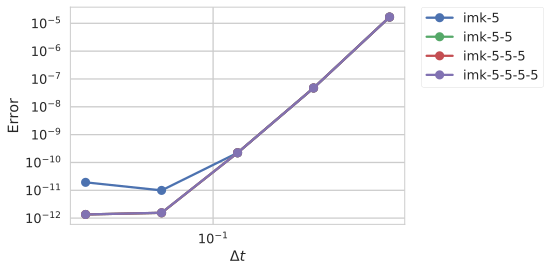

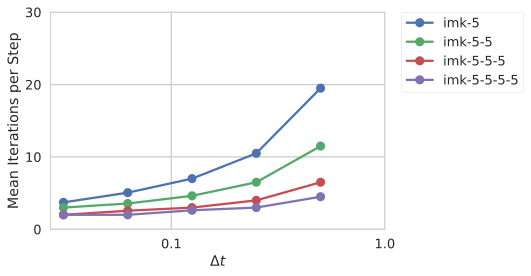

In [10]:
%rm output/*particles_11*pkl

results = OrderedDict()
for i in range(1, 5):
    key = 'imk' + '-5'*i
    results[key] = {'levels': i, 'nodes': [5]*i, 'nterms': [10]*i, 'val':[]}

params = Params(exe=exe, inttype='imk', qtype='lob', sdc=True, vcycle=True, tfinal=1.0, iterations=50)
toda = PFASST(params)

nsteps = range(1, 6)
for k, r in tqdm(results.iteritems(), total=len(results), desc='method progress'):
    toda.p.levels = r['levels']
    toda.p.nodes = r['nodes']
    toda.p.nterms = r['nterms']
    toda.p.sweeps = [1]*r['levels']
    toda.p.sweeps_pred = [1]*r['levels']
    r['val'] = exp.convergence_exp(toda, steps=nsteps)
    
plot_convergence(results)
plot_iteration_behavior(results, logy=False)

## MKRK4 Check ✅

slope = 3.86135509447


slope = 3.28517124443


slope = 3.36066915575



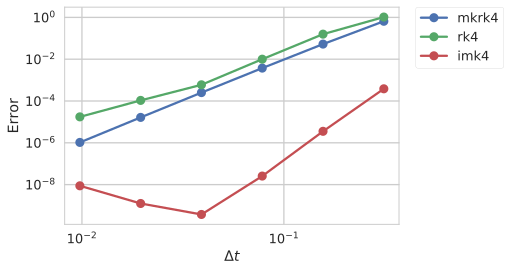

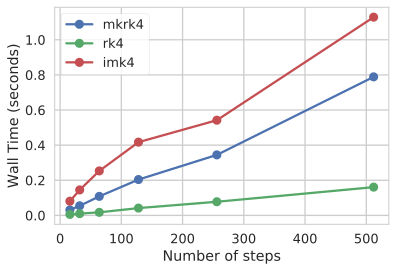

In [257]:
%rm output/*particles_11*pkl

results = OrderedDict()
i = 1
results['mkrk4'] = {'inttype': 'imk.mkrk', 'levels': i, 'nodes': [5]*i, 'nterms': [10]*i, 'val':[]}
results['rk4'] = {'inttype': 'imk.rk', 'levels': i, 'nodes': [5]*i, 'nterms': [10]*i, 'val':[]}
results['imk4'] = {'inttype': 'imk', 'levels': i, 'nodes': [5]*i, 'nterms': [10]*i, 'val':[]}

nsteps = range(4, 10)
iters = 1
for k, r in tqdm(results.iteritems(), total=len(results), desc='method progress'):
    if k == 'imk4':
        iters = 5
    params = Params(exe=exe, qtype='lob', levels=1, inttype=r['inttype'],
                    sweeps=[1], sweeps_pred=[1], nterms=[10], nodes=[5],
                    sdc=True, vcycle=True, tfinal=5.0, iterations=iters)
    toda = PFASST(params)

    r['val'] = exp.convergence_exp(toda, steps=nsteps)
    
plot_convergence(results)
plot_timings(results)

## RK4 Check ✅

env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1
Params(exe='/home/bkrull/devel/pfasst-nwchem/libpfasst/tests/imk/main.exe', filename=None, levels=1, tfinal=10.0, iterations=1, nsteps=128, nodes=[5], magnus=[1], nterms=[5], sweeps=[1], sweeps_pred=[0], exptol=['1.d-15'], nprob=4, tasks=1, basis='', molecule='', exact_dir='', nersc=False, dt=0.078125, timings=False, solutions=True, particles=11, periodic=True, vcycle=False, tolerance=1e-12, qtype='lob', inttype='imk.rk', sdc=False, rk=True, mkrk=False)


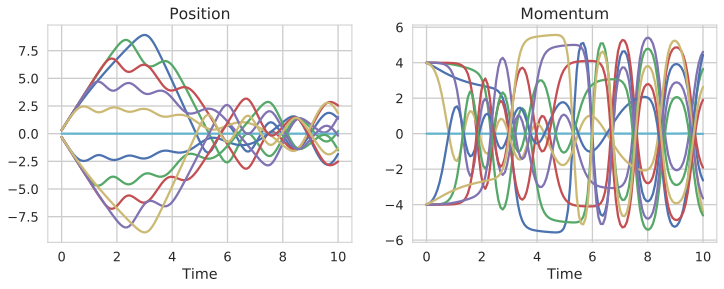

In [258]:
%rm output/*particles_11*pkl
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1
params_11 = Params(inttype='imk.rk', qtype='lob', exe=exe,
                   nodes=[5], sweeps=[1], sweeps_pred=[0], vcycle=False,
                   nsteps=128, solutions=True, iterations=1, sdc=False)
print(params_11)
toda_11 = PFASST(params_11)

results_rk = toda_11.run()[0]

fig, (ax1, ax2) = toda_11.plot_toda(results_rk, maxparticles=0)

slope = 3.02069770468



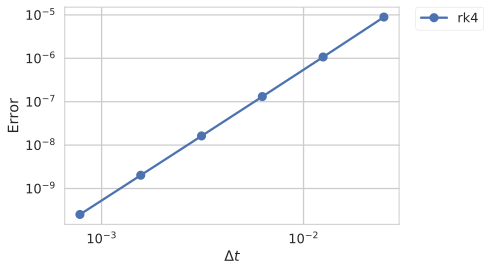

In [259]:
%rm output/*particles_11*pkl

results = OrderedDict()
i = 1
key = 'rk4'
results[key] = {'levels': i, 'nodes': [5]*i, 'nterms': [10]*i, 'val':[]}

params = Params(exe=exe, inttype='imk.rk', qtype='lob', 
                sdc=True, vcycle=True, tfinal=0.1, iterations=1)
toda = PFASST(params)

nsteps = range(2, 8)
for k, r in tqdm(results.iteritems(), total=len(results), desc='method progress'):
    toda.p.levels = r['levels']
    toda.p.nodes = r['nodes']
    toda.p.nterms = r['nterms']
    toda.p.sweeps = [1]*r['levels']
    toda.p.sweeps_pred = [1]*r['levels']
    r['val'] = exp.convergence_exp(toda, steps=nsteps)
    
plot_convergence(results)

# Magnus Picard vs. IMK

In [188]:
results_4 = OrderedDict()
results_4['mag-4-1'] = {'levels': 1, 'nodes': [3], 'magnus': [2], 'inttype':'mag', 'val':[]}
results_4['mag-2'] = {'levels': 1, 'nodes': [2], 'magnus': [1], 'inttype':'mag', 'val':[]}
results_4['mag-6'] = {'levels': 1, 'nodes': [3], 'magnus': [3], 'inttype':'mag', 'val':[]}
results_4['iMK-3(5)'] = {'levels': 1, 'nodes': [3], 'nterms': [5], 'sdc': True, 'inttype':'imk', 'val':[]}
results_4['iMK-5(7)'] = {'levels': 1, 'nodes': [5], 'nterms': [7], 'sdc': True, 'inttype':'imk', 'val':[]}
results_4['iMK-3(5)-7(7)'] = {'levels': 2, 'nodes': [3, 7], 'nterms': [5, 12], 'sdc': True, 'inttype':'imk', 'val':[]}

def evolve(**kwargs):
    levels = kwargs['levels']
    sweeps = sweeps_pred = [1]*levels
    inttype = kwargs['inttype']
    
    if 'mag' in inttype:
        p = attr.evolve(toda.p, levels=levels, sweeps=sweeps, sweeps_pred=sweeps_pred, inttype=inttype, qtype='gauss',
                nodes=kwargs['nodes'], magnus=kwargs['magnus'])
    else:
        p = attr.evolve(toda.p, levels=levels, sweeps=sweeps, sweeps_pred=sweeps_pred, inttype=inttype, qtype='lob',
                        nodes=kwargs['nodes'], nterms=kwargs['nterms'], sdc=kwargs['sdc'])
    return p

env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1


slope = 3.8116253306


slope = 2.39770045196


slope = 5.40291737701


slope = 4.54186191981


slope = 5.87691454333


slope = 4.04941597811



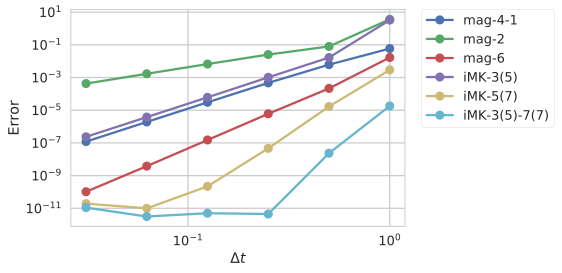

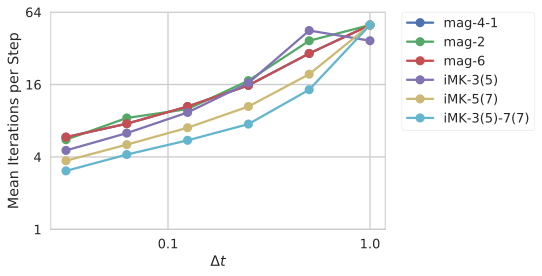

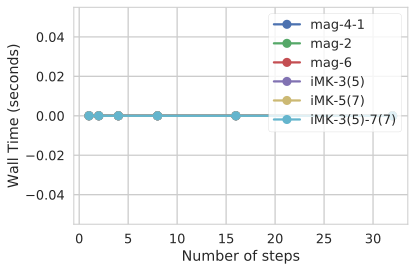

In [189]:
%rm output/*particles_11*pkl
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1

params = Params(inttype='mag', qtype='gauss', particles=50,
                sdc=True, vcycle=True, tfinal=1.0, iterations=50)

nsteps = range(0, 6)
for k, r in tqdm(results_4.iteritems(), total=len(results_4), desc='method progress'):
    if r['inttype'] == 'mag':
        params.exe = mag
    else:
        params.exe = exe
        
    toda = PFASST(params)
    toda.p = evolve(**r)

    r['val'] = exp.convergence_exp(toda, steps=nsteps)
    
plot_convergence(results_4, fname=results_home+'mag_vs_imk_conv.png')
plot_iteration_behavior(results_4)
plot_timings(results_4)

# Convergence with respect to nterms

In [28]:
results_5 = OrderedDict()
for i in [1, 2, 4, 8, 10, 15]:
    results_5['imk-5({})'.format(i)] = {'nodes': [5], 'nterms': [i], 'val':[]}
    
def evolve(**kwargs):
    nodes = kwargs['nodes']
    nterms = kwargs['nterms']
    levels = 1
    sweeps = sweeps_pred = [1]

    p = attr.evolve(toda.p, levels=levels, sweeps=sweeps, sweeps_pred=sweeps_pred,
                    nodes=kwargs['nodes'], nterms=kwargs['nterms'])
    return p

rm: cannot remove 'output/*particles_11*pkl': No such file or directory
env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1


slope = 3.07924665178


slope = 2.8990072015


slope = 1.62728944735


slope = 1.39570646285


slope = 1.39621460908


slope = 1.39623776973



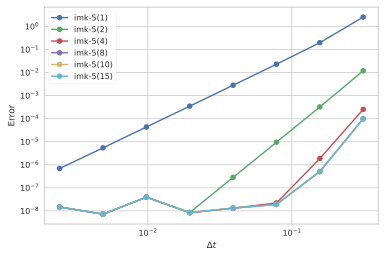

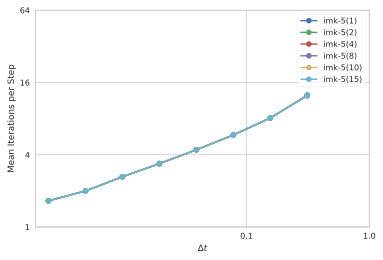

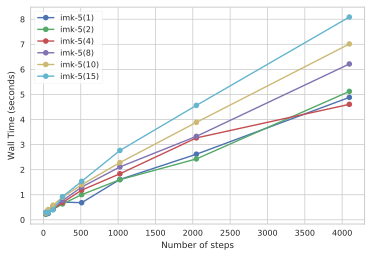

In [30]:
%rm output/*particles_11*pkl
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1

params = Params(exe=exe, inttype='imk')

nsteps = range(5,13)
for k, r in tqdm(results_5.iteritems(), total=len(results_5), desc='method progress'):
    params.exe = exe
        
    toda = PFASST(params)
    toda.p = evolve(**r)

    r['val'] = exp.convergence_exp(toda, steps=nsteps)
    
plot_convergence(results_5)#, fname=results_home+'mag_vs_imk_conv.png')
plot_iteration_behavior(results_5)
plot_timings(results_5)

# Effect of exponential tolerance

# Adaptively growing number of terms -> effect on isospectricity

# Convergence Behavior
Maximum absolute error of $\mathbf{L}$ at time $t = 10.0$ as a function of the number of steps for a periodic 11-particle Toda lattice. The reference solution is taken as the solution using 3 Gauss-Legendre nodes and two terms in the Magnus Expansion with a time step of $\Delta t = t * 2^{-14}$. 

In [9]:
results = OrderedDict()
results['iMK-2'] = {'levels': 1, 'nodes': [2], 'nterms': [4], 'val':[]}
results['iMK-3'] = {'levels': 1, 'nodes': [3], 'nterms': [6], 'val':[]}
results['iMK-5'] = {'levels': 1, 'nodes': [5], 'nterms': [10], 'val':[]}
results['iMK-7'] = {'levels': 1, 'nodes': [7], 'nterms': [14], 'val':[]}
results['iMK-2-7'] = {'levels': 2, 'nodes': [2, 7], 'nterms': [4, 12], 'val':[]}
results['iMK-2-5-7'] = {'levels': 3, 'nodes': [2, 4, 7], 'nterms': [4, 10, 12], 'val':[]}

env: OMP_NUM_THREADS=1
env: OPENBLAS_NUM_THREADS=1


slope = 1.70112176026


slope = 3.66347649964


slope = 5.36343708344


slope = 2.45850018629


slope = 2.31607037365


slope = 3.1928353149



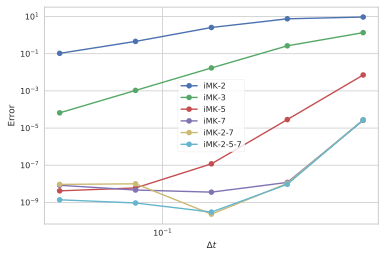

In [10]:
%rm output/*particles_11*pkl
%set_env OMP_NUM_THREADS=1
%set_env OPENBLAS_NUM_THREADS=1

params = Params(inttype='imk', qtype='lob', sdc=False, vcycle=True, tfinal=5.0)
toda = PFASST(exe, params)

nsteps = range(3,8)
for k, r in tqdm(results.iteritems(), total=len(results), desc='method progress'):
    toda.p.levels = r['levels']
    toda.p.nodes = r['nodes']
    toda.p.nterms = r['nterms']
    toda.p.sweeps = [1]*r['levels']
    toda.p.sweeps_pred = [1]*r['levels']
    r['val'] = exp.convergence_exp(toda, steps=nsteps)
    
plot_convergence(results)

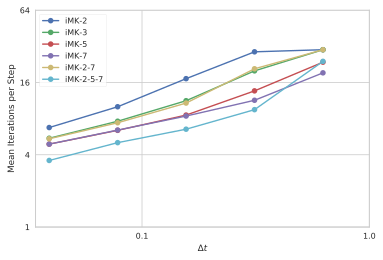

In [11]:
plot_iteration_behavior(results, logy=True)

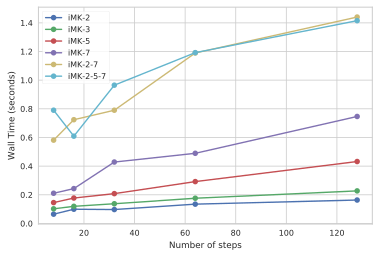

In [10]:
plot_timings(results)

## Iteration behavior with respect to the order of the method

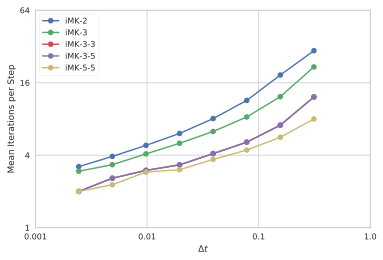

In [36]:
fig, ax = plt.subplots()

for k, rr in results.iteritems():
    if type(r) is list:
        continue
        
    r = rr['val']
    ax.plot(r.dt.values, 
            r.iterations.values, label=k, marker='o')

ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('$\Delta t$')
ax.set_ylabel('Mean Iterations per Step')
ax.legend()

dt = np.linspace(-3, 0, num=4)
dt = np.power(10, dt).astype(np.float_)

iters = np.linspace(0, 6, num=4)
iters = np.power(2, iters).astype(np.float_)

ax.set_xticks(dt)
ax.set_xticklabels(dt)
ax.set_yticks(iters)
ax.set_yticklabels(map(int, iters))

# fig.savefig(results_home+'toda-iterations-full-comp.png', dpi=300)

# Behavior of iterates for each processor

** THIS CANNOT BE COMPLETED UNTIL THE HANGING BUG IS FIXED **

The average number of iterations for the $N$th processor is higher than for the first processor, but the increase only moderately decreases the efficiency of the overall calculation.

## Single-level

In [71]:
%rm output/*particles_11*tasks_16*pkl
nsteps = range(4, 9)

levels = 1
params = Params(tasks=16, exe=exe, levels=levels, tolerance=0.0,
                nodes=[5], nterms=[10], vcycle=False,
                sweeps=[1]*levels, sweeps_pred=[1]*levels,
                inttype='imk', qtype='lob', tfinal=1.0)
toda = PFASST(params)
results = {}
results['test'] = {'val': exp.convergence_exp(toda, steps=nsteps)}

plot_convergence(results)
fig, ax = results['test']['val'].plot_residual_vs_cpu_for_each_iteration(idx=0, legend=False)
# fig.savefig(results_home+'toda-res_vs_cpu_mpi16-nsteps{}.png'.format(2**nsteps[0]), dpi=300)

fig, ax = results['test']['val'].plot_residual_vs_cpu_for_each_iteration(idx=1, legend=True)
# fig.savefig(results_home+'toda-res_vs_cpu_mpi16-nsteps{}.png'.format(2**nsteps[1]), dpi=300)

rm: cannot remove 'output/*particles_11*tasks_16*pkl': No such file or directory


KeyboardInterrupt: 

## Multi-level

In [34]:
results

{'test': {'val':          dt nsteps   nodes magnus  iterations  tfinal  \
  0  0.062500     16  [3, 5]    [1]        10.0     1.0   
  1  0.015625     64  [3, 5]    [1]        10.0     1.0   
  2  0.003906    256  [3, 5]    [1]        10.0     1.0   
  
                                        final_solution  \
  0  [[(1.76151473627+0j), (0.469467033608+0j), (-2...   
  1  [[(1.76162636184+0j), (0.469487494973+0j), (-1...   
  2  [[(1.76163000844+0j), (0.469488538568+0j), (-8...   
  
                                           total_times  \
  0  {0: 0.0602712631, 1: 0.061205864, 2: 0.0801465...   
  1  {0: 0.7971591949, 1: 0.8092508316, 2: 0.828849...   
  2  {0: 3.2737834454, 1: 3.2754480839, 2: 3.279678...   
  
                                            trajectory     error  
  0       index    time  rank  step  iter  level   ...  2.542645  
  1        index     time  rank  step  iter  level ...  2.536330  
  2        index     time  rank   step  iter  level...  2.536080  }}


slope = 0.0485527626557


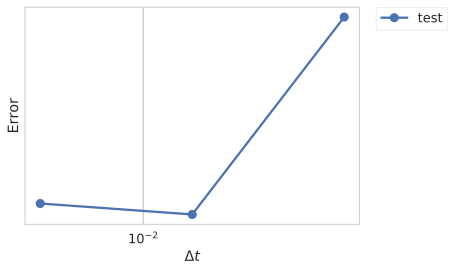

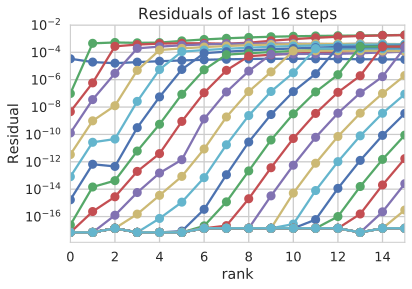

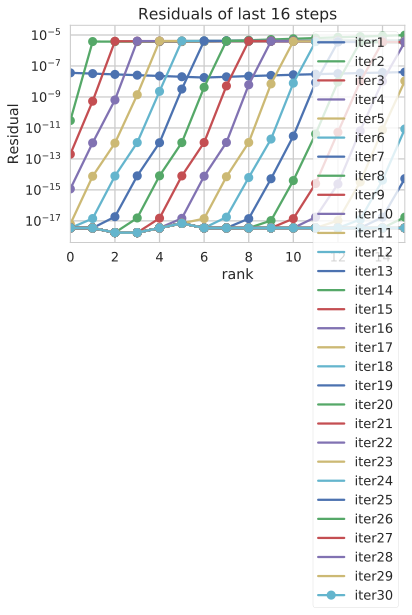

In [35]:
%rm output/*particles_11*tasks_16*pkl
levels = 2
params = Params(tasks=16, exe=exe, levels=levels, tolerance=0.0,
                nodes=[3, 5], nterms=[5, 10], vcycle=True,
                sweeps=[1]*levels, sweeps_pred=[5, 1]*levels, iterations=30,
                inttype='imk', qtype='lob', tfinal=1.0)
toda = PFASST(params)
results = {}
results['test'] = {'val': exp.convergence_exp(toda, steps=range(4, 10, 2))}

plot_convergence(results)
fig, ax = results['test']['val'].plot_residual_vs_cpu_for_each_iteration(idx=0, legend=False)
# fig.savefig(results_home+'toda-res_vs_cpu_mpi8-nsteps{}.png'.format(2**nsteps[0]), dpi=300, bbox_inches='tight')

fig, ax = results['test']['val'].plot_residual_vs_cpu_for_each_iteration(idx=1, legend=True)
# fig.savefig(results_home+'toda-res_vs_cpu_mpi16-nsteps{}.png'.format(2**nsteps[1]), dpi=300)

# Convergence behavior with respect to number of pipelined processors

In this regard, we expect that the average number of iterations increases as the more processors are used. What we do gain instead, since we're doing PinT, is that there should be a speedup because the number of iterations being computed are being done simultaneously instead of serially.

## Theoretical performance gains
Total parallel time, $T_p = N(1+ \frac{K_p}{p})$, where $N$ is the number of steps, $K_p$ is the number of required iterations in the parallel case, and $p$ is the number of processors.

Total serial time, $T_s = N*K_s$, where $K_s$ is the number of required iterations in the serial case.

Speedup $S = T_s / T_p = K_s/(1+\frac{K_p}{p})$

Efficiency $E = S / p$

In [ ]:
Speedups = namedtuple('Speedups', ['ks', 'kp', 'p'])
def calc_speedup(s):
    return s.ks/(1+s.kp/s.p)
def calc_eff(s):
    return calc_speedup(s)/s.p

In [ ]:
# %rm output/*coarsemagnus_3*
fig2, ax2 = plt.subplots()
lvls = 1

params = Params(tfinal=1.0, tasks=1, levels=lvls, 
                sweeps_pred=[2]*lvls, sweeps=[1]*lvls, nodes=[3]*lvls, magnus=[3]*lvls, 
                particles=11, iterations=1000, tolerance=1e-12, qtype='gauss',
                periodic=True, verbose=True, solutions=False, timings=False)
toda = PFASST(exe, params)

for i in tqdm(range(0, 7)):
    tasks = 2**i
    toda.p.tasks = tasks
    step1 = 2 if i < 3 else i
    nsteps = range(step1,10)
    r = exp.convergence_exp(toda, steps=nsteps)
    label_str = '$N_p = {}$'
    ax2.plot(r.nsteps, r.iterations, 
             label=label_str.format(tasks), marker='o')
    
ax2.legend()
ax2.set_xscale("log", nonposx='clip')
ax2.set_yscale("log", nonposy='clip')
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('Mean Number of Iterations')

nsteps = np.linspace(0, 10, num=6)
nsteps = np.power(2, nsteps).astype(np.float_)

iters = np.linspace(1, 5, num=5)
iters = np.power(2, iters).astype(np.float_)

ax2.set_xticks(nsteps)
ax2.set_xticklabels(map(int, nsteps))
ax2.set_yticks(iters)
ax2.set_yticklabels(map(int, iters))

fig2.savefig(results_home+'toda-iterations-mpi-order6.png', dpi=300)

In [ ]:
fig, ax = plt.subplots()
data = []
ks = results[0][1].loc[6, 'iterations']

for (tasks, r) in results:
    iters = r[r['nsteps'] == 64].iterations.values[0]
    data.append(Speedups(ks, iters, tasks))

speedups = []
effs = []
for i in data:
    spdup = calc_speedup(i)
    speedups.append(spdup)
    eff = calc_eff(i)
    effs.append(eff)
    print "speedup: {}, efficiency: {}".format(spdup, eff)    

nprocs = [2**i for i in range(3, 10)]
ax.plot(nprocs, speedups, marker='o', color=colors[0], label='Speedup')  
ax.set_ylabel('Speedup')
ax2 = ax.twinx()
ax2.plot(nprocs, effs, marker='o', color=colors[1], label='Efficiency')
ax2.set_ylabel('Efficiency')

ax.legend();

## Wall time scaling with respect to order and pipeline parallel

## Time to solution for the different orders and pipelined-parallel methods

Note: this is a precursor plot to the pareto-type plot I'm actually after



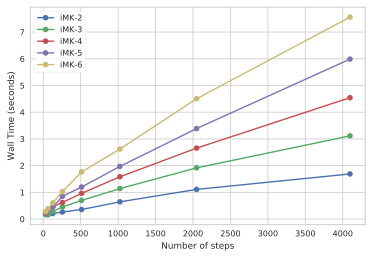

In [19]:
fig, ax = plt.subplots()

for k, r in results.iteritems():
    if type(r) is list:
        continue
    
    times = []

    for time in r['val'].total_times:
        times.append(sum(time.values()))
        
    ax.plot(r['val'].nsteps.values, times, marker='o', label=k)

ax.set_xlabel('Number of steps')
ax.set_ylabel('Wall Time (seconds)')
ax.legend()

# ax.set_xscale('log', nonposx='clip')
# nsteps = np.linspace(2, 12, num=11)
# nsteps = np.power(2, nsteps).astype(np.float_)
# ax.set_xticks(nsteps)
# ax.set_xticklabels(nsteps)
# fig.savefig(results_home+'toda-time.png', dpi=300)

## The Pareto-type Plot

The idea here is to show that given your two parameters, wall-clock and error, one would like to find the ideal method that minimizes the error and time-to-solution simultaneously. Only at very poor solutions (very large error) does it seem that a second-order method is worth using. For errors < $10^{-4}$, the fastest time-to-solution is achieved by the sixth order method, followed by fourth, followed by second. 

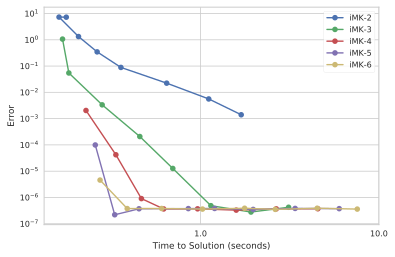

In [17]:
fig, ax = plt.subplots()

for k, r in results.iteritems():
    if type(r) is list:
        continue
    
    times = []

    for time in r['val']['total_times']:
        times.append(sum(time.values()))
        
    """ this is just to declutter plot from points that have O(1) error but more time steps"""
    if k == 'Lob-2':
        ax.plot(times[2:], r['val'].error.values[2:], marker='o', label=k)
    elif k == 'Lob-4-1' or k == 'Leg-2':
        ax.plot(times[1:], r['val'].error.values[1:], marker='o', label=k)
    else:
        ax.plot(times, r['val'].error.values, marker='o', label=k)

ax.grid(True)
ax.legend()
ax.set_xlabel('Time to Solution (seconds)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Error')

dt = np.linspace(0, 1, num=2)
dt = np.power(10, dt).astype(np.float_)
ax.set_xticks(dt)
ax.set_xticklabels(dt)

# fig.savefig(results_home+'toda-pareto-serial.png', dpi=300)